In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/content/student_scores - student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


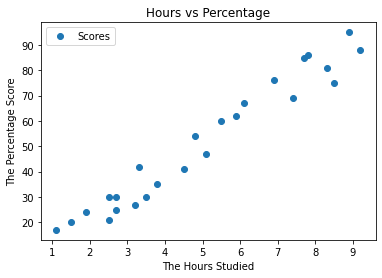

In [11]:
df.plot(x='Hours', y='Scores', style='o')    
plt.title('Hours vs Percentage')    
plt.xlabel('The Hours Studied')    
plt.ylabel('The Percentage Score')    
plt.show() 

In [12]:
import seaborn as sns

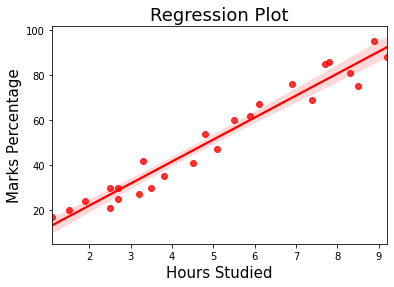

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [17]:
sns.regplot(x= df['Hours'], y= df['Scores'], color = 'r')
plt.title('Regression Plot',size=18)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()
print(df.corr())

In [18]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [30]:
train_X , val_X , train_Y , val_Y = train_test_split(X,Y, random_state = 0)

In [31]:
regression = LinearRegression()
regression.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [34]:
df1 = pd.DataFrame({'Actual':val_Y, 'Predicted':pred_Y})    
df1  


,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [36]:
hours = [[9.25]]  
own_pred = regression.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(own_pred[0]))  

Number of hours = [[9.25]]
Prediction Score = 93.89272889341652


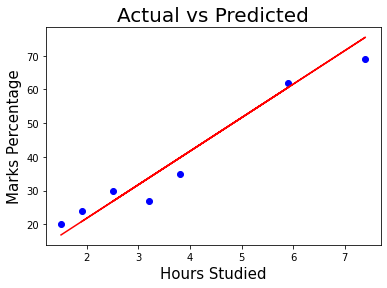

In [38]:
plt.scatter(x=val_X, y=val_Y, color='blue')
plt.plot(val_X, pred_Y, color='red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

In [39]:
print('Mean absolute error: ',mean_absolute_error(val_Y,pred_Y))

Mean absolute error:  4.130879918502482
